In [1]:
import nltk
#nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moizk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import gensim
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from gensim.models import Word2Vec

In [3]:
with open('urdu short 20k.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Create a DataFrame with the data
# 2-dimensial array
data = pd.DataFrame({'Column': lines})

In [4]:
data.shape

(20428, 1)

In [5]:
data.head()

,Column
0,\t عالمی بینکان سہولیات مراکز ذریعے منتخب خدما...
1,اسلام باد فیڈرل بورڈ ریونیو ایف بی دسمبر خری ت...
2,اسلام باد بورڈ انویسٹمنٹ بی ئی چیئرمین عاطف بخ...
3,اسلام اباد پاکستان ماہ نومبر مسلسل مہینے برامد...
4,اسلام باد نیشنل ٹرانسمیشن اینڈ ڈسپیچ کمپنی این...


In [6]:
data['Column'][1]

'اسلام باد فیڈرل بورڈ ریونیو ایف بی دسمبر خری تاریخ قبل ٹیکس سال گزشتہ سال مقابلے تقریبا فیصد انکم ٹیکس گوشوارے موصول ہیںڈان اخبار رپورٹ مطابق بورڈ دسمبر لاکھ ہزار ٹیکس گوشوارے موصول ٹیکس سال لاکھ ہزار ریٹرنز جمع کرائے تھےان تنخواہ دار تنخواہ دار افرادی کمپنیوں ایسوسی ایشنز شامل ہیںمزید پڑھیں انکم ٹیکس گوشوراے جمع تاریخ توسیع جائزے عرصے گوشواروں وصول ٹیکس ارب کروڑ روپے گزشتہ سال عرصے ارب کروڑ روپے وصول فیصد عکاسی ہےٹیکس سال انکم ٹیکس گوشوارے جمع خری تاریخ ستمبر توسیع عوام ریٹرن فائل سانی ہوٹیکس سال ایف بی لاکھ ریٹرنز ایف بی تاریخ تھےبھارت بادی مقابلے ریٹرن فائل تناسب فیصد فرانس فیصد کینیڈا فیصد پاکستان تقریبا فیصد موجود ہےوزیر اعظم معاون خصوصی برائے ریونیو ڈاکٹر وقار مسعود خان ڈان بتایا خری تاریخ توسیع اصولی فیصلہ ریٹرن فائلنگ دن بدن اضافہ جارہا ہےیہ پڑھیں ٹیکس پاکستانی رقوم منتقلی باعث زی فائیو پابندی لگائی فواد چوہدریڈاکٹر وقار فیلڈ فارمیشنز ہدایت انکم ٹیکس گوشوارے جمع وقت توسیع ڈیڈ لائن قبل فائل قابل تھےانہوں نان فائلرز ریٹرن فائل اضافی وقت طلب متعلقہ ٹیکس فس درخواست جمع کرانا ہوگیا

In [7]:
data.tail()

,Column
20423,فائل فوٹوممبئی طبی ماہرین کیلے روزانہ کھانے بل...
20424,رائٹرز فوٹوٹوکیو کوریا سام سنگ کمپنی ایس فور ا...
20425,ایف پی فوٹوبوسٹن امریکی سائنس دانوں مریض خلیوں...
20426,فائل فوٹوپیرس فرانسیسی سائنسدان ڈاکٹر برونو پا...
20427,ڈینگی وبا بننے مچھر ایڈیس ایجپٹائی تصویر سید ص...


In [8]:
#Tokenize the text
#lambda funciton hai (benifit loop ki tarha kam karta hai)
data['Tokenized'] = data['Column'].apply(lambda x: nltk.word_tokenize(x))

# Print the tokenized text
print(data['Tokenized'])

0        [عالمی, بینکان, سہولیات, مراکز, ذریعے, منتخب, ...
1        [اسلام, باد, فیڈرل, بورڈ, ریونیو, ایف, بی, دسم...
2        [اسلام, باد, بورڈ, انویسٹمنٹ, بی, ئی, چیئرمین,...
3        [اسلام, اباد, پاکستان, ماہ, نومبر, مسلسل, مہین...
4        [اسلام, باد, نیشنل, ٹرانسمیشن, اینڈ, ڈسپیچ, کم...
                               ...                        
20423    [فائل, فوٹوممبئی, طبی, ماہرین, کیلے, روزانہ, ک...
20424    [رائٹرز, فوٹوٹوکیو, کوریا, سام, سنگ, کمپنی, ای...
20425    [ایف, پی, فوٹوبوسٹن, امریکی, سائنس, دانوں, مری...
20426    [فائل, فوٹوپیرس, فرانسیسی, سائنسدان, ڈاکٹر, بر...
20427    [ڈینگی, وبا, بننے, مچھر, ایڈیس, ایجپٹائی, تصوی...
Name: Tokenized, Length: 20428, dtype: object


In [9]:
# Train Word2Vec model (CBOW)
model = Word2Vec(sentences=data['Tokenized'], vector_size=100, window=5, min_count=1, workers=4)

In [10]:
# Access word vectors
# pakistan to encode kardiya hai
print(model.wv['پاکستان'])  # Replace 'word' with the desired word to access its vector

[ 0.51336545  2.435849    1.2470903  -0.78093696 -0.2036216   1.5013896
 -0.24394578  0.8842532   0.17781146 -0.37501985  2.0228739  -2.8451989
  1.1354047   0.7181753   0.02761098  1.1302009   0.7904529   1.7907809
 -1.0736666  -0.31973898  1.2044942  -0.6795757   0.23713835  1.0001522
  2.4041436  -0.06842355  0.01296994 -1.475237   -1.0487133   0.09797326
 -1.7364196   2.0069923  -1.0922076   1.6678573   1.6799896  -0.13306661
  3.5550168  -0.0159453  -3.0016327  -0.8517548  -1.0908893   0.9579751
  0.56469816 -0.03096613  2.9036336   2.2097158  -2.2208066   0.06433244
  1.6137905   0.6044006  -0.2755354  -1.7808089  -1.9775522  -2.0552838
 -1.1843423  -2.8817267   2.4711692   1.0375676   1.4962493  -2.7597716
 -0.2751267  -1.3578621   1.5040718  -1.8903419  -2.748181   -1.3023732
  1.4685198  -0.10847971 -3.4756522   1.8998269  -1.2650911   3.5349865
 -0.11210156 -0.98216194  0.5992832   2.2632327   0.21432318 -0.26809877
  0.780745    0.14481851 -0.5639623   2.2891135  -1.6064994 

In [11]:
print(model.wv['پاکستانی'])  # Replace 'word' with the desired word to access its vector

[ 1.7905897   2.053709    0.08904449  0.42286065  0.85516983  2.8460603
 -0.24620928 -0.2123214  -1.5223459   1.4534811  -1.5028951  -0.04040207
  1.1088679   2.2034764  -0.5466539   0.48631477 -1.5264258   0.8319855
 -0.21958962 -2.9296887   0.7624339  -0.10536336  1.274868   -0.51104426
  3.4562495   1.0255384   1.6884999  -1.9058783   1.1387675   0.40189123
 -2.7596197   1.3078225  -0.44095492 -0.4751573   1.7998496   2.2288413
  2.3863108  -0.64533573 -1.8642254  -0.9303229   0.29229236  0.19410248
  1.1344081  -0.32171997  0.89549196  1.1061957  -1.6752535   0.5185715
  1.9920316  -0.15732785  0.47306174 -2.12156    -1.9820054  -2.3815656
 -3.8920336  -1.7999816   1.9622322   2.203259    1.8582633  -3.5686147
  0.20278743 -1.2764741   3.4421623  -2.909124   -1.0530456  -0.6060266
  1.2186527  -0.34891614 -2.8737984   2.239442    1.1911061   3.1048896
  0.05338627 -1.6778793  -0.21391523  0.8703177   2.1768694  -1.3990362
  1.6471508   0.39173436  0.10482557 -2.0408647  -1.2886543 

In [12]:
# Find similar words
similar_words = model.wv.most_similar('پاکستان')  # Replace 'word' with the desired word
print(similar_words)

[('پاکستانی', 0.647089958190918), ('ہےپاکستان', 0.6411412358283997), ('ترکی', 0.5951699018478394), ('ملک', 0.5840462446212769), ('چین', 0.5641136765480042), ('پاک', 0.5571520328521729), ('ازادی', 0.5463290214538574), ('بحالی', 0.5313437581062317), ('ممالک', 0.5249138474464417), ('پاکستانیوں', 0.5238726735115051)]


In [13]:
# Calculate word similarity
similarity = model.wv.similarity('پاکستانی', 'پاکستان')  # Replace 'word1' and 'word2' with the desired words
print(similarity)

0.64708996


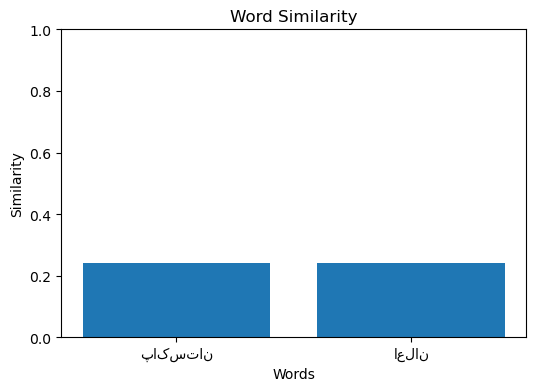

In [14]:
import matplotlib.pyplot as plt

# Calculate word similarity
word1 = 'پاکستان'
word2 = 'اعلان'
similarity = model.wv.similarity(word1, word2)

# Plot a bar chart for word similarity
plt.figure(figsize=(6, 4))
plt.bar([word1, word2], [similarity, similarity])
plt.xlabel('Words')
plt.ylabel('Similarity')
plt.title('Word Similarity')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1
plt.show()

D:\ANACONDa\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.draw()
D:\ANACONDa\lib\site-packages\seaborn\utils.py:80: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.draw()
D:\ANACONDa\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.draw()
D:\ANACONDa\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ANACONDa\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ANACONDa\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


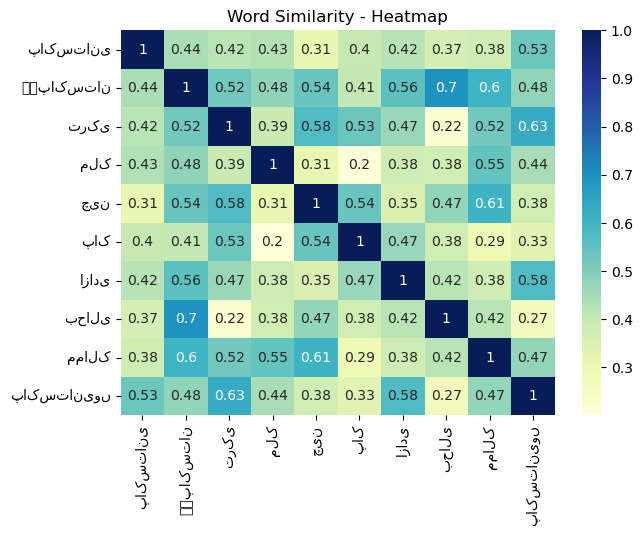

In [15]:
import numpy as np
import seaborn as sns

def calculate_similarity_matrix(embeddings):
    similarity_matrix = np.dot(embeddings, embeddings.T)
    similarity_matrix = similarity_matrix / np.linalg.norm(embeddings, axis=1)
    similarity_matrix = similarity_matrix / np.linalg.norm(embeddings, axis=1)[:, np.newaxis]
    return similarity_matrix

def plot_similarity_heatmap(similarity_matrix, labels):
    plt.figure(figsize=(7, 5))
    sns.heatmap(similarity_matrix, xticklabels=labels, yticklabels=labels, annot=True, cmap='YlGnBu')
    plt.title('Word Similarity - Heatmap')
    plt.show()

# Get word embeddings for similar words
similar_words = model.wv.most_similar('پاکستان', topn=10)
words = [word for word, _ in similar_words]
embeddings = model.wv[words]

# Calculate word similarity matrix
similarity_matrix = calculate_similarity_matrix(embeddings)

# Plot similarity heatmap
plot_similarity_heatmap(similarity_matrix, words)


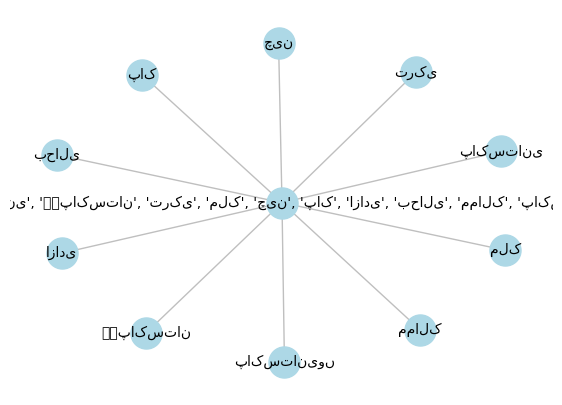

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_word_network(words, edges):
    G = nx.Graph()
    G.add_nodes_from(map(str, words))  # Convert words to strings
    G.add_edges_from([(str(u), str(v)) for u, v in edges])  # Convert edges to strings
    plt.figure(figsize=(7, 5))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
    plt.axis('off')
    plt.show()

# Define edges for the network graph
edges = [(words, similar_word) for similar_word, _ in similar_words]

# Plot word network graph
plot_word_network(words, edges)

In [17]:
# Train Word2Vec model SKIP GRAM
model2 = Word2Vec(sentences=data['Tokenized'], vector_size=100, window=5, min_count=1, workers=4, sg = 1)
# Create Skip Gram model

In [18]:
# Find similar words
similar_words = model2.wv.most_similar('پاکستانی')  # Replace 'word' with the desired word
print(similar_words)

[('ہےپاکستانی', 0.7506055235862732), ('پاکستان', 0.7472081184387207), ('ہیںپاکستانی', 0.7327233552932739), ('تھاپاکستانی', 0.7265732288360596), ('نیپالی', 0.721626341342926), ('نہیںپاکستانی', 0.7099648118019104), ('ہندوستانی', 0.687192440032959), ('کیپاکستانی', 0.6850179433822632), ('ہندوستانیوں', 0.6796734929084778), ('بھارتی', 0.6790531873703003)]


In [19]:
# Calculate word similarity x
similarity = model2.wv.similarity('پاکستان', 'پاکستانی')  # Replace 'word1' and 'word2' with the desired words
print(similarity)

0.7472081


In [20]:
# Retrieve vocabulary
#
vocabulary = list(model.wv.key_to_index)

# Print the first 100 items in the vocabulary
print(vocabulary[:100])

['فلم', 'خان', 'پاکستان', 'پڑھیں', 'سال', 'مطابق', 'جانب', 'وڈ', 'کام', 'روپے', 'بات', 'کردار', 'بتایا', 'اداکارہ', 'اداکار', 'وقت', 'حوالے', 'ریلیز', 'پی', 'نظر', 'بولی', 'فیصد', 'پیش', 'شادی', 'وجہ', 'علی', 'ارب', 'دنیا', 'کروڑ', 'پاکستانی', 'جاری', 'ٹی', 'قبل', 'ایف', 'حکومت', 'ملک', 'فلموں', 'گزشتہ', 'لاکھ', 'شامل', 'دیگر', 'کپور', 'ادا', 'میڈیا', 'ہزار', 'نام', 'بی', 'حاصل', 'زندگی', 'ئی', 'موجود', 'ڈالر', 'خواتین', 'ایس', 'ماہ', 'خلاف', 'استعمال', 'رواں', 'رپورٹ', 'کہانی', 'ڈان', 'کمپنی', 'سمیت', 'جی', 'اعلان', 'اضافہ', 'برس', 'شروع', 'ایم', 'دن', 'وی', 'ویڈیو', 'ای', 'ڈی', 'بہترین', 'کافی', 'امریکی', 'شاہ', 'فون', 'باعث', 'کار', 'بھر', 'شیئر', 'مختلف', 'ائی', 'موقع', 'سوشل', 'ٹیکس', 'بینک', 'خیال', 'ڈرامے', 'ذریعے', 'حصہ', 'اپ', 'کامیاب', 'قیمت', 'قرار', 'کرکے', 'عمر', 'نئے']


In [21]:
# Or, print the length of the vocabulary
print("Vocabulary size:", len(vocabulary))

Vocabulary size: 144867


In [22]:
import numpy as np

v1 = np.array([-3.1693861, 1.089218, 0.15445805, 0.47147807, -1.9198217, -1.6913921, 1.0953919, 0.44354624, 0.4436526, 0.11099622, 1.7977811, 1.8285902, -2.6630118, 0.1652277, 1.5050472, -2.3689318, 0.2881347, -1.288866, -1.4798429, 0.08503965, 0.5650662, 0.32305706, -0.23343256, -0.85511386, 1.690185, 0.35092762, 1.8137096, 1.5774086, -0.13994339, 0.73537606, -0.5606126, -1.7962028, 0.78633744, -1.4565322, 2.4835036, -0.7831323, 0.27285114, -0.29365623, 3.4221015, -1.4785007, -1.4102057, 1.0736289, 0.5246906, -0.3233546, 1.9485217, 0.8848728, 2.2266185, -1.251853, 1.6858735, -0.28397045, 1.4294095, -0.06184983, -2.2719147, 1.5618688, 0.86684734, -1.2007, 1.8375237, -3.8215485, -0.41322595, 0.66252863, 2.2253935, 1.2775841, -0.19238363, 0.72843075, 1.2796663, 0.192489, -1.5206876, -1.5199615, -0.12057094, -1.9747044, -0.30126143, -0.23900181, -1.1900922, -0.38178787, 0.17761993, -0.79481924, 0.35733336, 2.678675, -3.0626254, 0.26639503, 1.6550031, 1.0343392, 0.88254803, -3.5984812, -0.82306296, 2.7656288, -1.3986765, -1.2786801, -0.9662148, -1.129492, 3.4581022, -3.561517, 0.8058163, -0.56379086, -0.25624576, -2.1902914, -2.3456404, -0.38014993, -0.6903903, -1.2233343])
v2 = np.array([0.22029945, 0.06046035, 0.5369375, -1.4714861, 0.4939944, -1.677158, 0.71214914, -0.626734, -1.2032799, 1.2166439, -1.5824716, 0.5155905, 0.5874508, 0.8787085, 3.2716591, -2.2992713, -1.4097705, -2.7596517, -2.70075, 1.6456541, 1.1052778, 2.2930412, -2.3286154, -3.1433353, 0.80824345, 2.9354248, 1.6838101, -1.3973347, -1.4648913, 2.2933722, -1.0417038, -1.4726368, -1.0126863, -1.9317414, 0.41745847, -2.6962667, 0.42611274, -0.02042404, 4.819524, -1.3606684, -1.1047516, 0.90279096, 2.3761802, -0.68722814, 2.6279278, 1.6985244, 1.4472342, -2.6969872, 1.3572335, -1.4830959, 0.6389106, -1.8490893, -1.0743427, 3.8151436, -2.766854, -0.31706488, 0.7963136, -0.5706778, 0.90492296, 0.2446622, 1.2640212, 0.00883261, 0.08382315, 1.9471426, -0.4170813, 2.2396793, 0.27690408, -0.72175455, -2.0117922, 0.6875337, 2.2525008, -0.8014509, -0.3983547, -0.8096277, -1.0316958, -3.1974924, -0.6679315, 0.1846542, -1.3125235, 1.4400821, 0.8984554, -0.4355573, 0.7993908, -3.2273927, 1.9972804, 1.5658373, 0.35833317, -2.2665334, -2.82896, 2.147269, 1.6344006, -3.7484243, 0.46724495, -2.3128943, 3.639604, -4.496769, -2.0169256, -2.970446, -3.0283089, -0.30216613])

# Calculate cosine similarity
dot_product = np.dot(v1, v2)
norm_v1 = np.linalg.norm(v1)
norm_v2 = np.linalg.norm(v2)
similarity = dot_product / (norm_v1 * norm_v2)

print(similarity)

0.5252135199094097


In [23]:
import nltk
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [24]:
# Tokenization and word embedding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Tokenized'])
sequences = tokenizer.texts_to_sequences(data['Tokenized'])
word_index = tokenizer.word_index
max_sequence_length = max(len(sequence) for sequence in sequences)
vocab_size = len(word_index) + 1

In [25]:
# Padding sequences
sequences = pad_sequences(sequences, maxlen=max_sequence_length)

In [26]:
labels = []
for i in range(len(lines)):
    if i < len(lines) // 2:
        labels.append(0)  # Assign 0 for the first half of lines
    else:
        labels.append(1)  # Assign 1 for the second half of lines

labels = np.array(labels)  # Convert the labels list to a NumPy array

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)


In [28]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [30]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=32)


511/511 [==============================] - 3519s 7s/step - loss: 0.3882 - accuracy: 0.8336 - val_loss: 0.3262 - val_accuracy: 0.8700


In [31]:
# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


128/128 [==============================] - 172s 1s/step
Accuracy: 0.5090553108174254
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      2080
           1       0.00      0.00      0.00      2006

    accuracy                           0.51      4086
   macro avg       0.25      0.50      0.34      4086
weighted avg       0.26      0.51      0.34      4086

Confusion Matrix:
[[2080    0]
 [2006    0]]


D:\ANACONDa\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ANACONDa\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ANACONDa\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
word_embeddings = model.layers[0].get_weights()[0]  # Get the word embeddings from the Embedding layer

word1 = "پاکستان"
word2 = "ہےپاکستانی"

if word1 in word_index and word2 in word_index:
    index1 = word_index[word1]
    index2 = word_index[word2]

    embedding1 = word_embeddings[index1]
    embedding2 = word_embeddings[index2]

    similarity = np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))
    print(f"Similarity between '{word1}' and '{word2}': {similarity}")
else:
    print("One or both words are not present in the word index.")


Similarity between 'پاکستان' and 'ہےپاکستانی': -0.19721557199954987
